In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
warnings.filterwarnings('ignore')

<ipython-input-3-11e6db1ccc70>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
train_data = pd.read_csv('/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Data Processing and Analytics/dataset_uci/train.csv')
test_data = pd.read_csv('/Users/iyamahoseremem/Documents/Data_Science_Analysis_Learning/Data Processing and Analytics/dataset_uci/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}') 

Shape of train data is: (4252, 563)
Shape of test data is: (1492, 563)


# Analysis

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [7]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity label',
       'Activity'],
      dtype='object', length=563)

In [9]:
train_data['Activity'].unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

<AxesSubplot:>

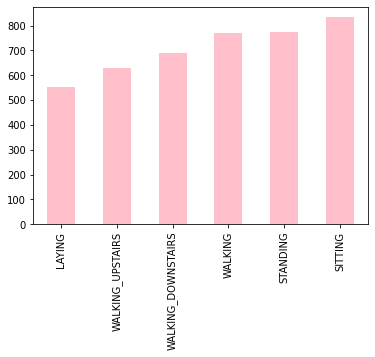

In [10]:
train_data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

In [11]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_train.shape, y_train.shape

((4252, 561), (4252, 1))

In [12]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((1492, 561), (1492, 1))

In [13]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [14]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((1492, 561), (1492,), (4252, 561), (4252,))

In [15]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train) 
x_test = scaling_data.transform(x_test)

# Creating the base model

In [60]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
#model.add(Dropout(0.1))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs= 55,validation_data = (x_test,y_test))

Epoch 1/55
133/133 [==============================] - 2s 10ms/step - loss: 1.3764 - accuracy: 0.3984 - val_loss: 1.1689 - val_accuracy: 0.4571
Epoch 2/55
133/133 [==============================] - 1s 6ms/step - loss: 1.0796 - accuracy: 0.5452 - val_loss: 0.9944 - val_accuracy: 0.6133
Epoch 3/55
133/133 [==============================] - 1s 6ms/step - loss: 0.9137 - accuracy: 0.6731 - val_loss: 0.8374 - val_accuracy: 0.7245
Epoch 4/55
133/133 [==============================] - 1s 5ms/step - loss: 0.7887 - accuracy: 0.7197 - val_loss: 0.7447 - val_accuracy: 0.7272
Epoch 5/55
133/133 [==============================] - 1s 5ms/step - loss: 0.7042 - accuracy: 0.7502 - val_loss: 0.6871 - val_accuracy: 0.7473
Epoch 6/55
133/133 [==============================] - 1s 5ms/step - loss: 0.6410 - accuracy: 0.7705 - val_loss: 0.6422 - val_accuracy: 0.7849
Epoch 7/55
133/133 [==============================] - 1s 5ms/step - loss: 0.5899 - accuracy: 0.7933 - val_loss: 0.6164 - val_accuracy: 0.7701
Epoch

# Hypertuning the model

In [61]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(Dropout(0.1))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project project/Human_activity_recognition/oracle.json
INFO:tensorflow:Reloading Tuner from project/Human_activity_recognition/tuner0.json
Search space summary
Default search space size: 26
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value':

In [62]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [63]:
tuner.results_summary()

Results summary
Results in project/Human_activity_recognition
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
units0: 32
initializer: normal
activation: relu
units1: 416
units2: 416
units3: 480
units4: 320
units5: 512
units6: 64
units7: 64
units8: 512
units9: 128
units10: 416
units11: 512
units12: 512
units13: 416
units14: 352
units15: 448
units16: 480
units17: 128
units18: 224
units19: 224
units20: 96
units21: 384
units22: 384
Score: 0.8022788564364115
Trial summary
Hyperparameters:
num_layers: 9
units0: 384
initializer: uniform
activation: relu
units1: 160
units2: 128
units3: 448
units4: 160
units5: 512
units6: 160
units7: 64
units8: 512
units9: 448
units10: 192
units11: 64
units12: 512
units13: 256
units14: 320
units15: 480
units16: 480
units17: 224
units18: 352
units19: 288
units20: 288
units21: 320
units22: 96
Score: 0.6179624795913696
Trial summary
Hyperparameters:
num_layers: 6
units0: 416
initializer: uniform
activation: relu
units1: 480
units2: 256
units3: 

In [64]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=60, validation_data=(x_test,y_test))

Epoch 1/60
133/133 [==============================] - 2s 9ms/step - loss: 1.5287 - accuracy: 0.7683 - val_loss: 1.2750 - val_accuracy: 0.7976
Epoch 2/60
133/133 [==============================] - 1s 7ms/step - loss: 1.3896 - accuracy: 0.7806 - val_loss: 1.2061 - val_accuracy: 0.7989
Epoch 3/60
133/133 [==============================] - 1s 7ms/step - loss: 1.2789 - accuracy: 0.7881 - val_loss: 1.1933 - val_accuracy: 0.8110
Epoch 4/60
133/133 [==============================] - 1s 7ms/step - loss: 1.3380 - accuracy: 0.7806 - val_loss: 1.0493 - val_accuracy: 0.8110
Epoch 5/60
133/133 [==============================] - 1s 7ms/step - loss: 1.2736 - accuracy: 0.7820 - val_loss: 1.1978 - val_accuracy: 0.7929
Epoch 6/60
133/133 [==============================] - 1s 7ms/step - loss: 1.3185 - accuracy: 0.7836 - val_loss: 1.3608 - val_accuracy: 0.7916
Epoch 7/60
133/133 [==============================] - 1s 7ms/step - loss: 1.3220 - accuracy: 0.7822 - val_loss: 1.0041 - val_accuracy: 0.8083
Epoch 

In [65]:
model.summary()
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test), callbacks=Callback)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                17984     
                                                                 
 dense_1 (Dense)             (None, 416)               13728     
                                                                 
 dense_2 (Dense)             (None, 6)                 2502      
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
Total params: 34,214
Trainable params: 34,214
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
133/133 [==============================] - 1s 7ms/step - loss: 0.6873 - accuracy: 0.8434 - val_loss: 1.4465 - val_accuracy: 0.8231
Epoch 2/200
133/133 [====================

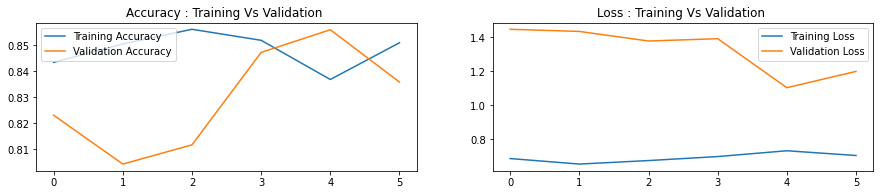

In [67]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']


plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(range(6), accuracy, label='Training Accuracy')
plt.plot(range(6), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(range(6), loss, label='Training Loss')
plt.plot(range(6), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

In [157]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import itertools
import matplotlib.pyplot as plt


In [168]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [169]:
for i in rounded_predictions:
    print(i)

1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
5
3
3
3
3
3
3
3
5
5
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
5
5
4
3
5
5
5
5
5
4
5
5
5
4
4
3
5
5
5
5
5
5
3
3
4
4
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
2
2
2
2
2
2
1
2
2
2
1
2
1
2
1
1
2
1
2
2
2
2
2
1
2
2
2
2
1
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
5
5
5
5
3
5
3
3
5
5
5
3
5
5
5
4
5
1
2
2
2
2
1
1
1
0
0
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
0
0
0
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
1
1
2
2
2
1
1
1
1
1
1
2
2
2
1
2
2
2
1
2
1
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [170]:
test_labels = np.array(y_test)

In [171]:
print (classification_report(test_labels, rounded_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       238
           1       0.77      0.78      0.77       289
           2       0.74      0.76      0.75       254
           3       0.82      0.93      0.87       243
           4       0.91      0.80      0.85       239
           5       0.85      0.77      0.81       229

    accuracy                           0.84      1492
   macro avg       0.84      0.84      0.84      1492
weighted avg       0.84      0.84      0.84      1492



In [172]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [173]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title= 'Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes) 
    
    if normalize:
        cm= cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalisation') 
        
    print(cm) 
    
    thresh = cm.max() 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout() 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[236   1   0   0   0   1]
 [  5 225  57   2   0   0]
 [  1  59 193   1   0   0]
 [  0   0   0 225   7  11]
 [  3   3   6  15 192  20]
 [  2   4   4  31  12 176]]


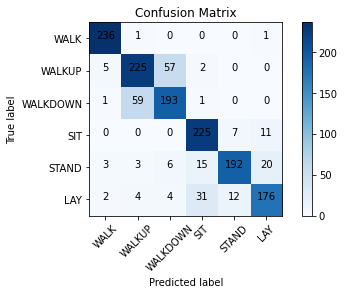

In [174]:
cm_plot_labels = ['WALK','WALKUP','WALKDOWN', 'SIT', 'STAND', 'LAY']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# AUC-ROC Curve

AUC-ROC score: 0.9024584134127047


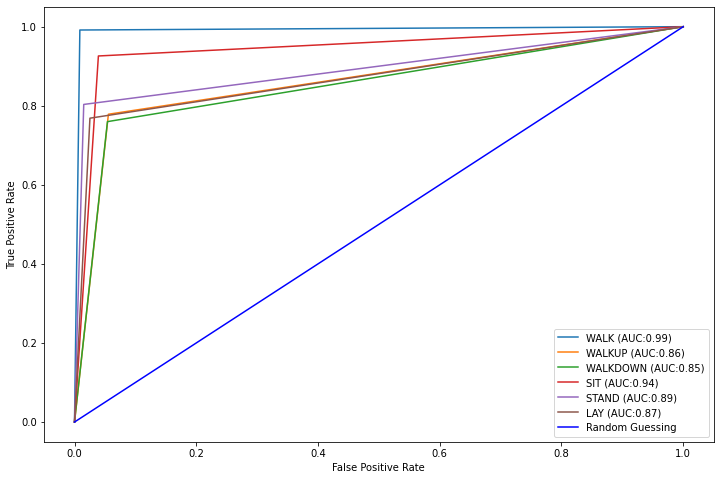

In [204]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['WALK', 'WALKUP', 'WALKDOWN', 'SIT', 'STAND',
          'LAY'] 


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(test_labels)
    y_test = lb.transform(test_labels)
    y_pred = lb.transform(rounded_predictions)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('AUC-ROC score:', multiclass_roc_auc_score(ytrain, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()